Data extraction and aggregation

In [1]:
import pandas as pd
import glob
import os

path = r'./UNSW-NB15/'

features = pd.read_csv("./UNSW-NB15/NUSW-NB15_features.csv", encoding='cp1252')

data = pd.concat([
    pd.read_csv(path + "UNSW-NB15_1.csv", low_memory=False, names=features.Name),
    pd.read_csv(path + "UNSW-NB15_2.csv", low_memory=False, names=features.Name),
    pd.read_csv(path + "UNSW-NB15_3.csv", low_memory=False, names=features.Name),
    pd.read_csv(path + "UNSW-NB15_4.csv", low_memory=False, names=features.Name)
])



In [2]:
data

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440039,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,,1,2,3,3,1,1,3,NaN,0
440040,59.166.0.7,20848,149.171.126.4,21,tcp,CON,0.365058,456,346,31,...,2,2,2,2,2,2,2,2,NaN,0
440041,59.166.0.3,21511,149.171.126.9,21,tcp,CON,6.335154,1802,2088,31,...,2,2,2,4,2,2,2,2,NaN,0
440042,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,,1,1,2,4,2,2,2,NaN,0


Let's try to analyze the class division

In [45]:
data_summary_attack = pd.DataFrame(data.Label)
data_summary_attack = data_summary_attack.reset_index().groupby("Label").count()
data_summary_attack.columns.values[0] = "Occurrencies"
data_summary_attack["Percentage"] = data_summary_attack.Occurrencies/data_summary_attack.sum()[0]
data_summary_attack

,Occurrencies,Percentage
Label,,
0,2218764,0.873513
1,321283,0.126487


We have a very unbalanced dataset. Now let's look at the attack classes

In [46]:
data_summary_classes = pd.DataFrame(data.attack_cat)
data_summary_classes.dropna(how="all")
data_summary_classes = data_summary_classes.reset_index().groupby("attack_cat").count()
data_summary_classes.columns.values[0] = "Occurrencies"
data_summary_classes["Percentage"] = data_summary_classes.Occurrencies/data_summary_classes.sum()[0]
data_summary_classes

,Occurrencies,Percentage
attack_cat,,
Fuzzers,5051,0.015721
Fuzzers,19195,0.059745
Reconnaissance,12228,0.038060
Shellcode,1288,0.004009
Analysis,2677,0.008332
Backdoor,1795,0.005587
Backdoors,534,0.001662
DoS,16353,0.050899
Exploits,44525,0.138585


Even the attack categories are highly unbalanced. Let's try to plot this data.
Let's start with the correlation matrix.

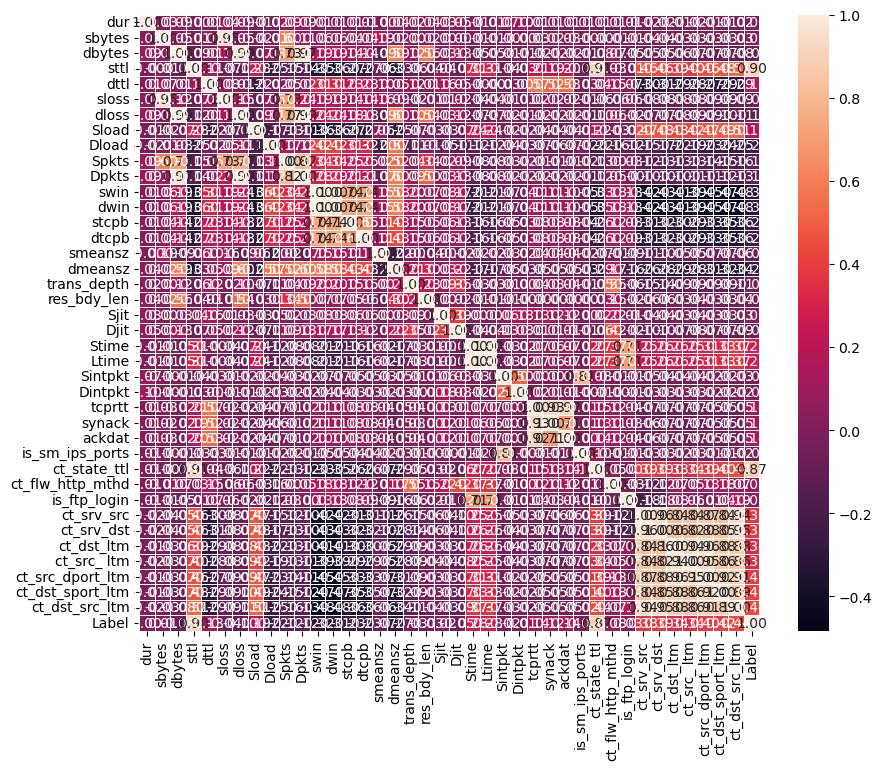

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
# data.corr()
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()